<a href="https://colab.research.google.com/github/earo12/Business-Forecasting/blob/main/Business_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Forecasting
I've found this dataset in network which it's about Adidas company, here are presented data about revenues by quarterly from 2000 to 2021. 

Right now it's 2023 and so we can say that the data has been a little outdated but it's a good exercise to make forecasting with ARIMA model.

The dataset has two columns:

1) Time period (in quarterlies)

2) Revenue (in million dolars)



# Loading libraries

In [1]:
#Here I'm using the same libraries I've been using during my carrying out projects
#Also I've found that to make seasonal predictions it's advisable to use ARIMA model 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import datetime
from datetime import date, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

# Data processing

As usual, we have to load the data frame and see what it contains.

In [3]:
df = pd.read_csv('adidas-quarterly-sales.csv')
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


Let's check if it has missing values or not.

In [ ]:
df.isnull().sum()

Time Period    0
Revenue        0
dtype: int64

As we see there aren't any missing value, which is really good because we don't have to fill anything.
In order to introduce more about the forecasting, let's take a look at the information of the features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  88 non-null     object
 1   Revenue      88 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
df.shape

(88, 2)

Here we can see it's a really small dataset, so I'm going to plot in a line plot to see the trend of the revenues.

# Data visualization

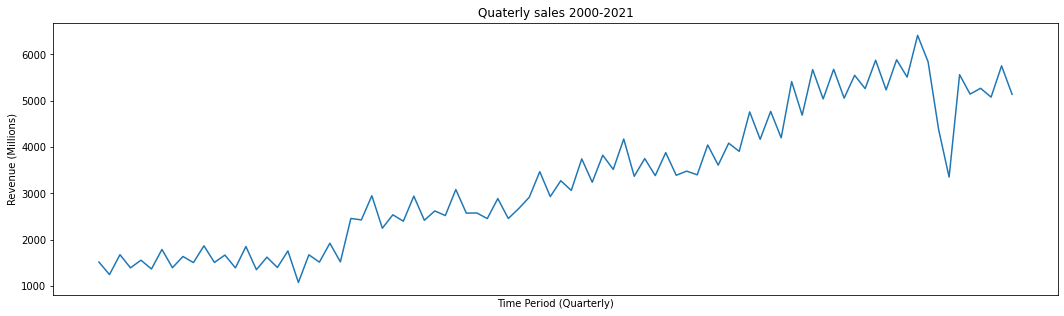

In [ ]:
plt.rcParams['figure.figsize'] = (18,5)
ax = sns.lineplot(data = df, x = df['Time Period'], y = df['Revenue'])
ax.set_xticks([])
plt.xlabel('Time Period (Quarterly)')
plt.ylabel('Revenue (Millions)')
plt.title('Quaterly sales 2000-2021')
plt.show()

Here we have to say something, that big down peak it's because of the COVID-19 pandemic situation we were, also it corresponds to the first quarterly of 2020.

# Training model

Now I'll use the multiplicative model which it's been already loaded at the beginning of the project.

Seasonal decompose is used to estimate the trend by applying a convolution of the filter data over a period of time, the model can be additive or multiplicative.

In [ ]:
values = seasonal_decompose(df['Revenue'], model = 'multiplicative', period = 30)

So now, we're going to see the plot of the trend of the revenues.

<Figure size 1296x360 with 0 Axes>

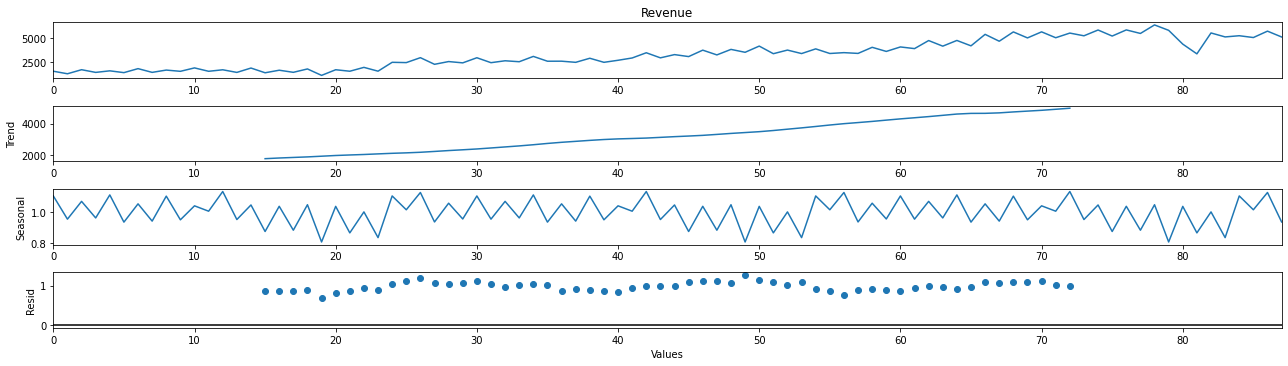

In [ ]:
plt.figure()
values.plot()
#plt.set_size_inches(15,10)
plt.xlabel('Values')
plt.show()

From the last figure we can see that the trend it's increasing, so the revenues might be increasing as well.

So for now we're going to use ARIMA model.

Also, because from the second plot we see that data is not seasonal, we can conclude that d value is 1, d value will be used later and we have to find out p and q values.

I've found out that p and q values are found if you use the auto correlation plots.

Text(0.5, 1.0, 'Auto correlation plot')

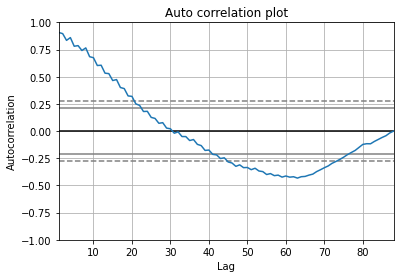

In [4]:
pd.plotting.autocorrelation_plot(df['Revenue'])
plt.title('Auto correlation plot')

Because the auto correlation plot goes down from all the gray lines, we conclude that p value is 5.

Let's check now the partial autocorrelation in order to find out q value.

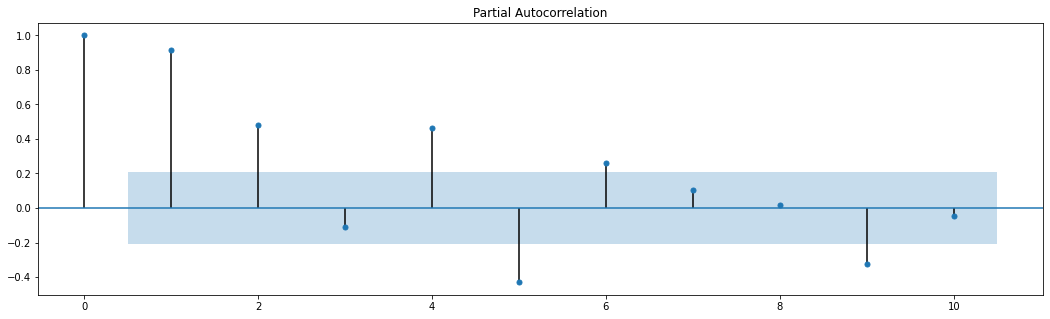

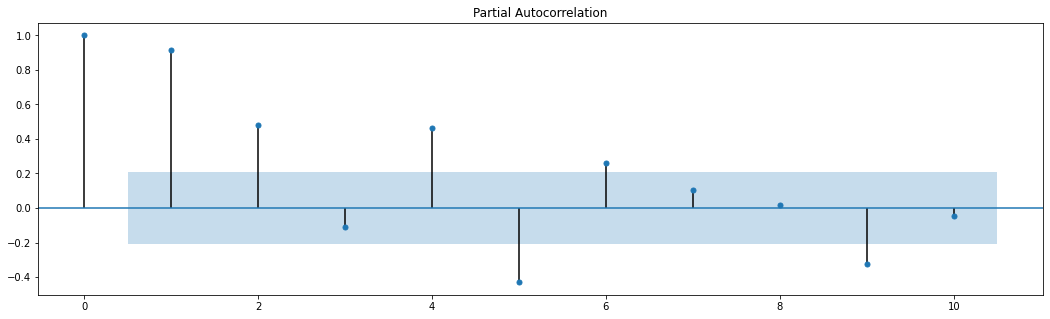

In [ ]:
plot_pacf(df['Revenue'], lags = 10)

From the partial auto correlation we have two values at the beginnig so we can conclude that q value is equal to 2.

In [ ]:
p = 5
q = 2   #Values we're going to use in the SARIMAX model
d = 1

With the information we have, now we can apply the SARIMAX model to fit it and finally make predictions.

In [ ]:
model = sma.tsa.statespace.SARIMAX(df['Revenue'], order = (p, d, q), seasonal_order = (p, d, q, 12))
model = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now we can check out the summary of the model

In [ ]:
print('Summary of the Sarima model: ')
print(model.summary())

Summary of the Sarima model: 
                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Wed, 01 Feb 2023   AIC                           1127.041
Time:                                    22:06:13   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5796      0.392     -4.030      0.000      -2.348      -0.811
ar.L2

And take a look to the predicted values with the next 4 years

In [ ]:
values_predicted = model.predict(len(df), len(df) + 15) # for next 4 years
print(values_predicted)

88     6078.792955
89     5186.311833
90     6293.194351
91     5751.903574
92     5911.950387
93     5499.789411
94     6389.628878
95     5728.808376
96     6322.841040
97     5973.014561
98     6648.428246
99     6101.944057
100    6697.682859
101    6215.179640
102    7247.167074
103    6572.660403
Name: predicted_mean, dtype: float64


Finally we can check out the graph and see how will be the revenues

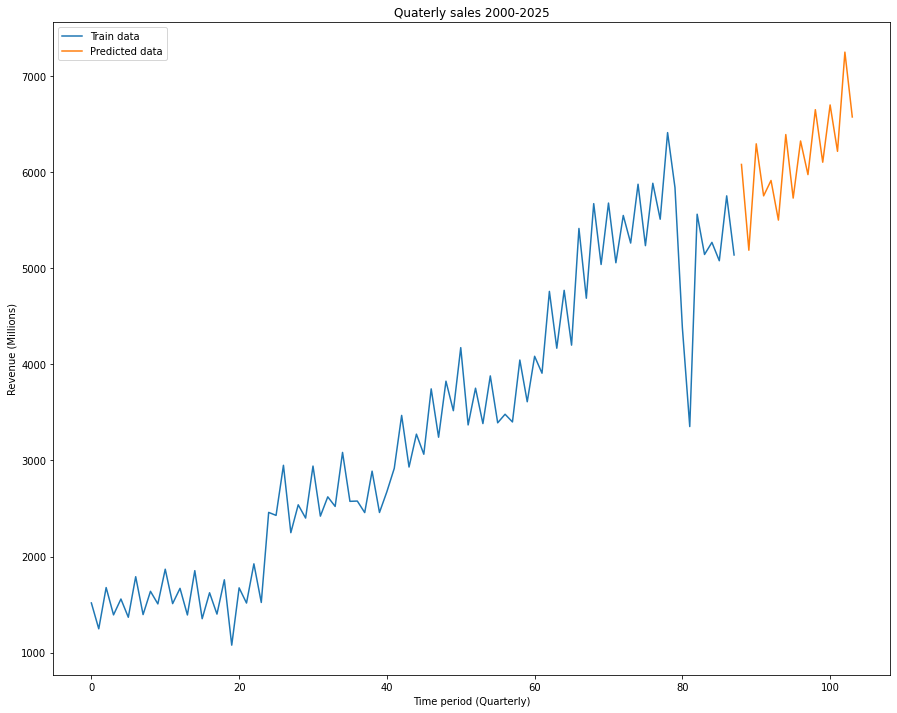

In [ ]:
df['Revenue'].plot(legend = True, label = 'Train data', figsize = (15, 12))
values_predicted.plot(legend = True, label = 'Predicted data')
plt.xlabel('Time period (Quarterly)')
plt.ylabel('Revenue (Millions)')
plt.title('Quaterly sales 2000-2025')
plt.show()

# Conclusion

Finally we found that we can make a forecasting using SARIMA model, also we have to say that we didn't use many values with the partial correlation plot, se a good way to improve the model is using more lags.